In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
train = pd.read_csv('train4.csv')
test = pd.read_table('test4.txt',sep=',')

# description ',' 때문에 밀린 data 몇개?
print(train['Unnamed: 12'].notnull().sum() +\
train['Unnamed: 13'].notnull().sum() +\
train['Unnamed: 14'].notnull().sum() +\
train['Unnamed: 15'].notnull().sum())

# 밀린 data 제거
train = train.drop(train[train['Unnamed: 12'].notnull()].index.values, axis=0)
train = train.drop(train[train['Unnamed: 13'].notnull()].index.values, axis=0)
train = train.drop(train[train['Unnamed: 14'].notnull()].index.values, axis=0)
train = train.drop(train[train['Unnamed: 15'].notnull()].index.values, axis=0)

train = train.drop(['Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15'], axis=1)

58


C:\Users\KTH\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\KTH\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


In [29]:
train.head()

,index,country,description,designation,points,price,province,region_1,region_2,taster_name,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15,Douro,NaN,NaN,Roger Voss,Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Pinot Noir,Sweet Cheeks


In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49958 entries, 0 to 50000
Data columns (total 12 columns):
index          49958 non-null int64
country        49930 non-null object
description    49958 non-null object
designation    35621 non-null object
points         49958 non-null object
price          46430 non-null object
province       49930 non-null object
region_1       41763 non-null object
region_2       19203 non-null object
taster_name    39717 non-null object
variety        49958 non-null object
winery         49958 non-null object
dtypes: int64(1), object(11)
memory usage: 5.0+ MB


In [50]:
dataset = pd.concat([train[['country','taster_name']],test[['country','taster_name']]], axis=0)

In [51]:
dataset.shape

,country,taster_name
0,Italy,Kerin O’Keefe
1,Portugal,Roger Voss
2,US,Paul Gregutt
3,US,Alexander Peartree
4,US,Paul Gregutt
5,Spain,Michael Schachner
6,Italy,Kerin O’Keefe
7,France,Roger Voss
8,Germany,Anna Lee C. Iijima
9,France,Roger Voss


## eda & preprocessing 

In [31]:
# taster name 제거
# train = train.drop('taster_name', axis=1)

In [32]:
# numeric 데이터 변환
train['points'] = train['points'].astype('int')
# train['price'] = train['price'].fillna('9999')
# train['price'] = train['price'].astype('int')
# train['price'] = train['price'].transform(lambda x: train['price'].median() if x==9999 else x).astype('int')  # NaN값 이었던 가격 중간값으로 대체
train = train.drop('price', axis=1)  # test data에 'price' column 없음..

In [33]:
train_cols = train.columns.drop('points')
test = test[train_cols]  # 'Unnamed' column 제거

### 시각화

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49958 entries, 0 to 50000
Data columns (total 11 columns):
index          49958 non-null int64
country        49930 non-null object
description    49958 non-null object
designation    35621 non-null object
points         49958 non-null int32
province       49930 non-null object
region_1       41763 non-null object
region_2       19203 non-null object
taster_name    39717 non-null object
variety        49958 non-null object
winery         49958 non-null object
dtypes: int32(1), int64(1), object(9)
memory usage: 4.4+ MB


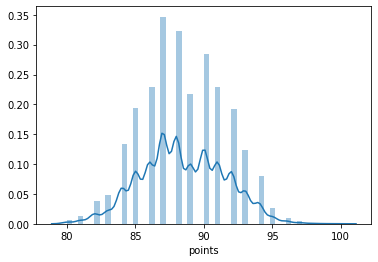

In [35]:
numeric_cols = ['points']
fig, ax = plt.subplots(nrows=len(numeric_cols))

for i, col in enumerate(numeric_cols):
    sns.distplot(train[col], ax=ax)

### tf-idf 만들기

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from string import punctuation
import re

In [37]:
text = train['description'][0]
text

"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity."

In [38]:
def word_tokenize(text):
    text = text.lower()
    text = re.sub(f'[{punctuation}0-9]+', '', text)
    word_tokens = text.split(' ') 
    
    stopwords = ['a', 'the', 'and', 'that', 'with', 'it', 'of', 'some', 'with', 'while', 'isnt', 'arent', 
                 'am', 'is', 'are', 'its', 'be', 'from', 'some', 'through', 'was', 'were', 'more', 'few', 
                 'to', 'this', 'as', 'if', 'i', 'you', 'he', 'she', 'they', 'we', 'will', 'in', 'for', 'very',
                 'much', 'little', 'an', 'have', 'has', 'but', 'over', 'include']
    tmp = []    
    for word in word_tokens:
        if word in stopwords:
            pass
        else:
            tmp.append(word)
    word_tokens = tmp.copy()
    
    return word_tokens

In [39]:
train['description'] = train['description'].transform(word_tokenize)

In [ ]:
train_X = train['description'].transform(lambda x: ' '.join(x))

# dtm 만들기
dtm_vector = CountVectorizer(stop_words='english')
train_X_dtm = dtm_vector.fit_transform(train_X)

# dtm -> tf-idf 변환하기
tfidf_transformer = TfidfTransformer()
tfidf_vector = tfidf_transformer.fit_transform(train_X_dtm)

In [41]:
# y_train = train['points']
# model = MultinomialNB()
# model.fit(tfidf_vector, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [42]:
y_train = train['points']
model = RandomForestClassifier()
model.fit(tfidf_vector, y_train)

C:\Users\KTH\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
test['description'] = test['description'].transform(word_tokenize)

In [44]:
test_X = test['description'].transform(lambda x: ' '.join(x))

test_X_dtm = dtm_vector.transform(test_X)
tfidf_test = tfidf_transformer.transform(test_X_dtm)

In [45]:
pred = model.predict(tfidf_test)

In [46]:
idx = pd.DataFrame(test['index'], columns=['index'])
pred = pd.DataFrame(pred, columns=['points'])

In [47]:
pd.concat([idx, pred], axis=1).to_csv('submission.csv')